# Solutions for 3D solute transport in uniform background flow
This notebook shows some examples of three-dimensional solute transport in uniform background flow. The examples are based on [Wexler (1992)](https://doi.org/10.3133/twri03B7), as is the underlying code.

## Infinite aquifer with a continuous point source

In [1]:
# imports used across the examples
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

Text(0, 0.5, 'y (ft)')

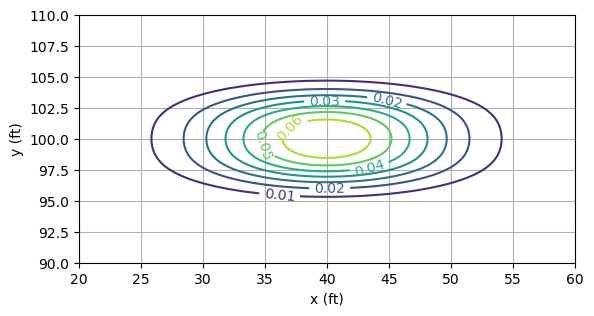

In [2]:
from adepy.uniform import point3

n = 0.25
v = 0.1
al = 0.6
ah = 0.03
av = 0.006
c0 = 1000
w1 = (0, 98, 10)
w2 = (0, 100, 10)
w3 = (0, 102, 10)
Dx = al * v
Dy = ah * v
Dz = av * v
Q = 1.0

x, y = np.meshgrid(np.linspace(20, 60, 100), np.linspace(90, 110, 100))
z = 10
t = 400
dt = 1

cw1 = point3(c0, x, y, z, t, v, n, al, ah, av, Q, w1[0], w1[1], w1[2]) - point3(
    c0, x, y, z, t - dt, v, n, al, ah, av, Q, w1[0], w1[1], w1[2]
)
cw2 = point3(c0, x, y, z, t, v, n, al, ah, av, Q, w2[0], w2[1], w2[2]) - point3(
    c0, x, y, z, t - dt, v, n, al, ah, av, Q, w2[0], w2[1], w2[2]
)
cw3 = point3(c0, x, y, z, t, v, n, al, ah, av, Q, w3[0], w3[1], w3[2]) - point3(
    c0, x, y, z, t - dt, v, n, al, ah, av, Q, w3[0], w3[1], w3[2]
)

c = cw1 + cw2 + cw3

cs = plt.contour(x, y, c / c0)
plt.gca().set_aspect(1.0)
plt.clabel(cs, fmt="%.2f")
plt.grid()
plt.xlabel("x (ft)")
plt.ylabel("y (ft)")

## Bounded aquifer with a patch source

C:\Users\casne\Documents\R\repos\adepy\adepy\uniform\threeD.py:139: RuntimeWarning: overflow encountered in exp
  ) + np.exp((x * (v + beta)) / (2 * Dx)) * erfc(
C:\Users\casne\Documents\R\repos\adepy\adepy\uniform\threeD.py:139: RuntimeWarning: invalid value encountered in multiply
  ) + np.exp((x * (v + beta)) / (2 * Dx)) * erfc(


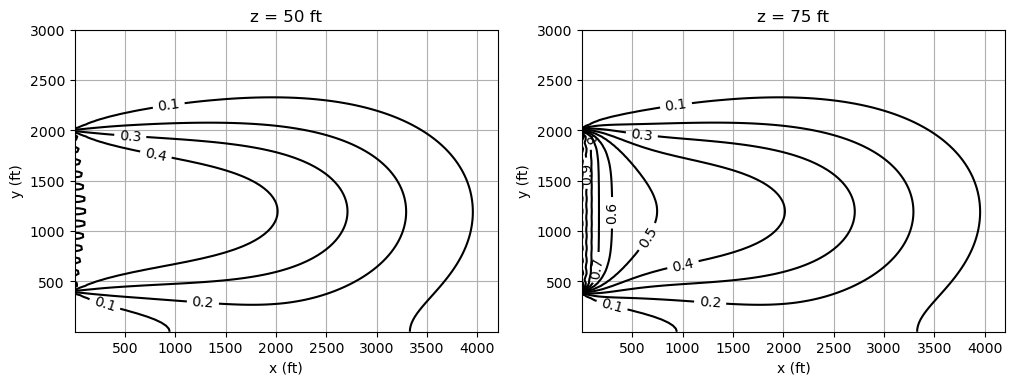

In [3]:
from adepy.uniform import patchf

w = 3000
h = 100
y1 = 400
y2 = 2000
z1 = 50
z2 = 100
c0 = 1000
v = 1
al = 200
ah = 60
av = 10

t = 3000
z_levels = [50, 75]
x, y, z = np.meshgrid(np.linspace(1, 4200, 100), np.linspace(1, 3000, 100), z_levels)

c = patchf(c0, x, y, z, t, v, al, ah, av, w, h, y1, y2, z1, z2, nterm=50)

fig, ax = plt.subplots(1, len(z_levels), figsize=(12, 4))

for i, z in enumerate(z_levels):
    cs = ax[i].contour(
        x[:, :, i],
        y[:, :, i],
        c[:, :, i] / c0,
        colors="black",
        levels=np.arange(0.1, 1.1, 0.1),
    )
    ax[i].clabel(cs, fmt="%.1f")
    ax[i].set_aspect(1.0)
    ax[i].set_xlabel("x (ft)")
    ax[i].set_ylabel("y (ft)")
    ax[i].grid()
    ax[i].set_title(f"z = {z} ft")

## Semi-infinite aquifer with a patch source

For this problem, Domenico & Robbins (1985) provided a popular closed-form solution.

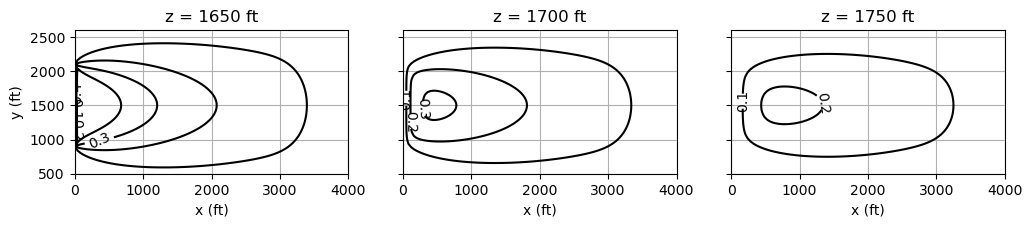

In [4]:
from adepy.uniform import patchi

w = 1200
h = 300
y1 = 900
y2 = 2100
z1 = 1350
z2 = 1650
v = 1
al = 100
ah = 20
av = 20
c0 = 100
half_life = 28 * 365

lamb = np.log(2) / half_life

z_elev = [1650, 1700, 1750]
x, y, z = np.meshgrid(np.linspace(0, 4000, 100), np.linspace(500, 2600, 100), z_elev)
t = 10 * 365

c = patchi(c0, x, y, z, t, v, al, ah, av, y1, y2, z1, z2, lamb=lamb)

fig, ax = plt.subplots(1, len(z_elev), figsize=(12, 4), sharey=True)

for i, z in enumerate(z_elev):
    cs = ax[i].contour(
        x[:, :, i],
        y[:, :, i],
        c[:, :, i] / c0,
        colors="black",
        levels=np.arange(0.1, 1.1, 0.1),
    )
    ax[i].clabel(cs, fmt="%.1f")
    ax[i].set_aspect(1.0)
    ax[i].set_xlabel("x (ft)")
    if i == 0:
        ax[i].set_ylabel("y (ft)")
    ax[i].grid()
    ax[i].set_title(f"z = {z} ft")